In [1]:
!pip install xgboost


In [3]:
#CTR-Pre-processingAndTrainingDataDevelopment
#loading the necessary packages

#%reset
%reset_selective -f regex
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
%matplotlib inline

In [5]:
#CTR-Pre-processingAndTrainingDataDevelopment
#Step 1: Create Dummy Variables for Categorical Features

import pandas as pd

# Correct file path (use raw string to avoid backslash issues)
#file_path = r'C:\Users\vidus\OneDrive\Documents\SpringBoard\CapestoneProjects\CapstoneTwo-CTR-Pre-processingAndTrainingDataDevelopment\data\clean_data\cleaned_ctr_prediction_data.csv'
file_path = r'C:\Users\vidus\OneDrive\Documents\SpringBoard\CapestoneProjects\Final-ProjectCTRPrediction\data\clean_data\cleaned_ctr_prediction_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75058 entries, 0 to 75057
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             75058 non-null  int64
 1   C1                75058 non-null  int64
 2   banner_pos        75058 non-null  int64
 3   site_id           75058 non-null  int64
 4   site_domain       75058 non-null  int64
 5   site_category     75058 non-null  int64
 6   app_id            75058 non-null  int64
 7   app_domain        75058 non-null  int64
 8   app_category      75058 non-null  int64
 9   device_id         75058 non-null  int64
 10  device_ip         75058 non-null  int64
 11  device_model      75058 non-null  int64
 12  device_type       75058 non-null  int64
 13  device_conn_type  75058 non-null  int64
 14  C14               75058 non-null  int64
 15  C15               75058 non-null  int64
 16  C16               75058 non-null  int64
 17  C17               75058 non-nul

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
0,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,-1,79,21,0,1
1,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
2,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
3,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
4,0,1005,1,881,439,0,656,23,0,4865,...,320,50,2161,0,35,-1,157,21,0,1


In [7]:
#Create Dummy Variables for Categorical Features

# Select manageable categorical features for dummy variable creation
categorical_cols = ['banner_pos', 'site_category', 'app_category',
                    'device_type', 'device_conn_type', 'weekday']

# Create dummy variables (one-hot encoding), drop the first to avoid multicollinearity
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show the shape and first few rows of the transformed dataset
df_dummies.shape, df_dummies.head()


((75058, 62),
    click    C1  site_id  site_domain  app_id  app_domain  device_id  \
 0      0  1005      104          742     656          23       4865   
 1      0  1005      104          742     656          23       4865   
 2      0  1005      104          742     656          23       4865   
 3      0  1005      104          742     656          23       4865   
 4      0  1005      881          439     656          23       4865   
 
    device_ip  device_model    C14  ...  app_category_15  app_category_16  \
 0      35026           678  15706  ...            False            False   
 1      23734          1084  15704  ...            False            False   
 2      28374          1322  15704  ...            False            False   
 3      36650           956  15706  ...            False            False   
 4      23697          1144  18993  ...            False            False   
 
    app_category_17  app_category_18  device_type_1  device_type_4  \
 0            Fals

In [9]:
# Step 2: Standardize Numeric Features (excluding click)
from sklearn.preprocessing import StandardScaler

# Drop the target column 'click' before scaling
X = df.drop('click', axis=1)

# Create the scaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to a DataFrame (keep column names)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Reattach the target column
X_scaled_df['click'] = df['click'].values

# Show the first few rows
X_scaled_df.head()


,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday,click
0,0.022512,-0.491598,-0.913772,0.852371,-0.829826,0.352128,0.178354,-0.321387,0.187657,1.284855,...,-0.210344,-0.497055,-0.638328,-0.387304,-0.801436,-0.109505,0.0,0.0,0.0,0
1,0.022512,-0.491598,-0.913772,0.852371,-0.829826,0.352128,0.178354,-0.321387,0.187657,0.312392,...,-0.210344,-0.497055,-0.638328,-0.387304,1.247462,-0.109505,0.0,0.0,0.0,0
2,0.022512,-0.491598,-0.913772,0.852371,-0.829826,0.352128,0.178354,-0.321387,0.187657,0.711987,...,-0.210344,-0.497055,-0.638328,-0.387304,1.247462,-0.109505,0.0,0.0,0.0,0
3,0.022512,-0.491598,-0.913772,0.852371,-0.829826,0.352128,0.178354,-0.321387,0.187657,1.424713,...,-0.210344,-0.497055,-0.638328,-0.387304,1.247462,-0.109505,0.0,0.0,0.0,0
4,0.022512,1.989796,2.207125,-0.565810,-1.266040,0.352128,0.178354,-0.321387,0.187657,0.309206,...,-0.210344,0.617279,-0.638328,-0.387304,-0.801436,1.687416,0.0,0.0,0.0,0


In [11]:
#Step 3: Split Into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Separate features and target again
X = X_scaled_df.drop('click', axis=1)
y = X_scaled_df['click']

# Perform the split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the split shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60046, 24)
X_test shape: (15012, 24)
y_train shape: (60046,)
y_test shape: (15012,)


In [13]:
# Save the Preprocessed Data
# Save train and test sets to CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [15]:
# Step 4: Train a Baseline Model – Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[11731    39]
 [ 3204    38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11770
           1       0.49      0.01      0.02      3242

    accuracy                           0.78     15012
   macro avg       0.64      0.50      0.45     15012
weighted avg       0.72      0.78      0.69     15012


ROC AUC Score: 0.6230190831152508


In [17]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
[[10244  1526]
 [ 2628   614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     11770
           1       0.29      0.19      0.23      3242

    accuracy                           0.72     15012
   macro avg       0.54      0.53      0.53     15012
weighted avg       0.69      0.72      0.70     15012


ROC AUC Score: 0.6034704601929748


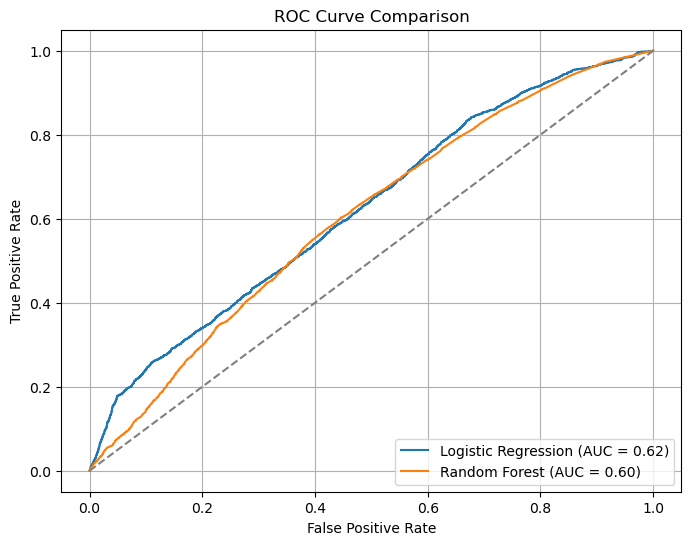

In [19]:
# Compare Models Using ROC Curves

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Compute AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Both models perform slightly better than random guessing (AUC = 0.50), but there's room to improve.



In [21]:
# XGBoost with Class Imbalance Handling

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Calculate class imbalance ratio
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Instantiate XGBoost without deprecated parameter
xgb = XGBClassifier(eval_metric='logloss',
                    scale_pos_weight=scale_pos_weight,
                    random_state=42)
xgb.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("\nROC AUC Score (XGBoost):", roc_auc_score(y_test, y_proba_xgb))


Confusion Matrix (XGBoost):
[[7176 4594]
 [1181 2061]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.61      0.71     11770
           1       0.31      0.64      0.42      3242

    accuracy                           0.62     15012
   macro avg       0.58      0.62      0.56     15012
weighted avg       0.74      0.62      0.65     15012


ROC AUC Score (XGBoost): 0.6791878525114039


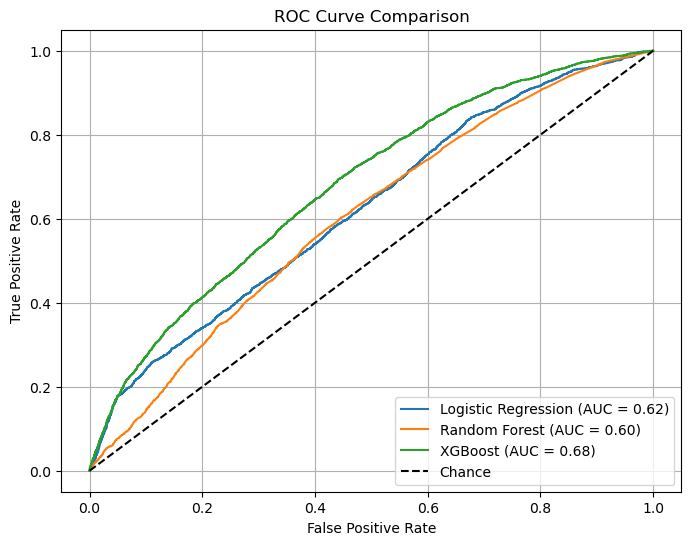

In [23]:
# Plot XGBoost on Your ROC Curve
# Compute ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Add to plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



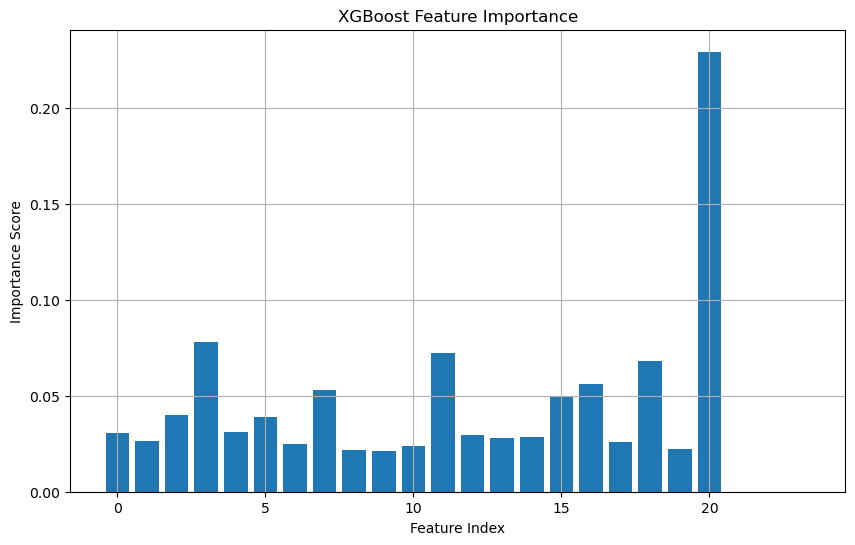

In [25]:
# Feature Importance (XGBoost)
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.feature_importances_  # Feature importances
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()


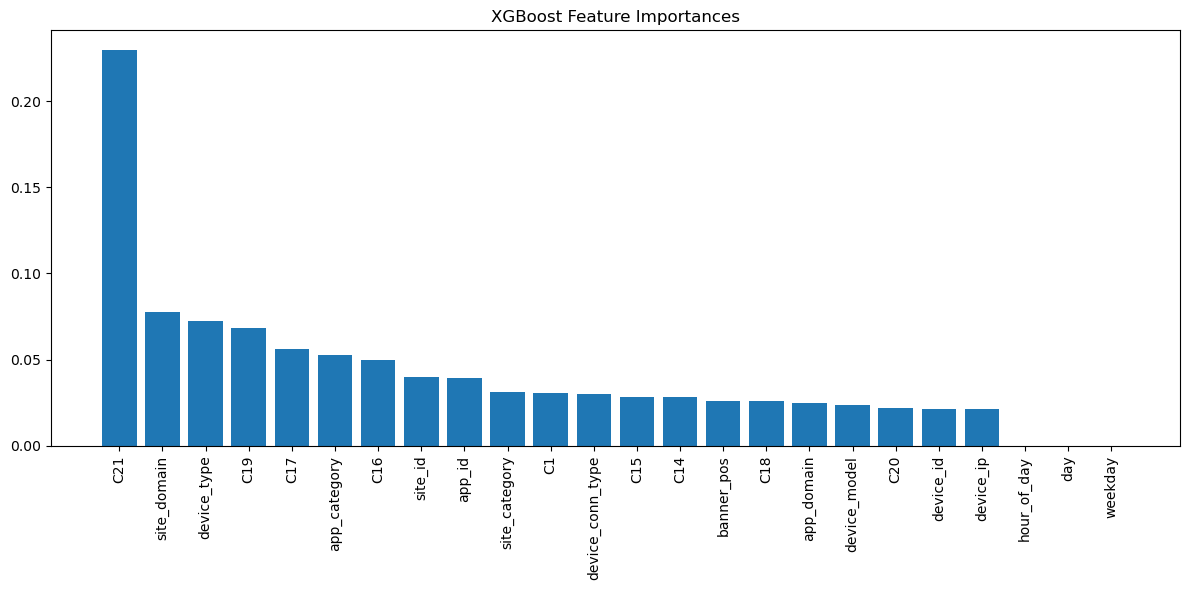

In [27]:
# Map Feature Importance Back to Feature Names
import numpy as np

# Get feature importances with feature names
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plot with names
plt.figure(figsize=(12, 6))
plt.title("XGBoost Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [29]:
# Check distribution in each set:

print("Original class distribution:")
print(y.value_counts(normalize=True))

print("\nTrain set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Original class distribution:
click
0    0.784047
1    0.215953
Name: proportion, dtype: float64

Train set class distribution:
click
0    0.784049
1    0.215951
Name: proportion, dtype: float64

Test set class distribution:
click
0    0.784039
1    0.215961
Name: proportion, dtype: float64


The dataset was split into training (80%) and testing (20%) sets, with stratification to preserve class distribution.

The dataset was split into training (80%) and testing (20%) subsets using stratify=y in the train_test_split() function. 

This ensured the class distribution of clicks vs. non-clicks was preserved in both subsets. 

Manual verification confirmed identical class proportions across the full dataset, training set, and test set.



In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11770
           1       0.49      0.01      0.02      3242

    accuracy                           0.78     15012
   macro avg       0.64      0.50      0.45     15012
weighted avg       0.72      0.78      0.69     15012



In [34]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [38]:
# XGBoost
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


In [40]:
# Calculate and Summarize Metrics for All Three Models
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
import pandas as pd

# Create a results list to store each model's metrics
model_results = []

# Logistic Regression
model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Recall (Click)': recall_score(y_test, y_pred_logreg),
    'ROC AUC': roc_auc_score(y_test, y_proba_logreg)
})

# Random Forest
model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall (Click)': recall_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_proba_rf)
})

# XGBoost
model_results.append({
    'Model': 'XGBoost (Final)',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Recall (Click)': recall_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_proba_xgb)
})

# Convert to DataFrame and display
comparison_df = pd.DataFrame(model_results)
print(comparison_df)


                 Model  Accuracy  Recall (Click)   ROC AUC
0  Logistic Regression  0.783973        0.011721  0.623019
1        Random Forest  0.723221        0.189389  0.603471
2      XGBoost (Final)  0.615308        0.635719  0.679188


- XGBoost achieved the highest recall (63.6%) and ROC AUC (0.679), making it the most effective model for identifying true clicks in this imbalanced dataset.

- While Logistic Regression had the highest overall accuracy (78.4%), it failed to capture true clicks effectively, with a recall of only 1.2%.

- Random Forest provided a balance between accuracy and recall but still underperformed compared to XGBoost in capturing positive class instances.

- XGBoost with class imbalance handling (scale_pos_weight) is recommended for deployment. Its superior recall and ranking performance make it well-suited for click-through rate (CTR) prediction where identifying positive outcomes is critical.

About the project -

Goal: Predict whether a user will click on an ad

Data preprocessing: encoding, scaling, and stratified splitting

Model training: Logistic Regression, Random Forest, XGBoost

Performance evaluation: Accuracy, Recall, ROC AUC

Feature importance analysis

XGBoost emerged as the best model due to its superior ability to detect actual clicks (recall) and higher ranking quality (ROC AUC).

The most influential features in click prediction were:

- C21: A strong encoded signal

- site_domain: Context about the platform

- device_type: User environment (e.g., mobile vs desktop)

Use XGBoost with class imbalance correction for CTR prediction tasks. It provides the best trade-off between sensitivity and precision, especially when the goal is to maximize detection of actual clicks.

● Does my data set have any categorical data, such as Gender or day of the week?

This dataset does contain categorical-like features, even though it doesn't have explicit labels like "Gender" or "Day of the Week".

some notable categorical or low-cardinality features:

The dataset includes several features that have only a few unique values, which makes them categorical. 

For example, click is the target column with two values (clicked or not). 

Other features like device_type and device_conn_type each have 4 values. 

Features like C15, C16, and C18 have between 4 to 6 values.

Columns such as banner_pos, C1, site_category, and app_category also have a small number of unique values. There are also some features like C21 and C19 that have more unique values but are still likely to be categories.


● Do my features have data values that range from 0 - 100 or 0-1 or both and more?

This CTR Prediction - dataset has features with values in many different ranges:

- Some features like click are just 0 or 1.

- Others like C15, C16, and C21 have values between 0 and 100.

- Columns like site_id, site_domain, and C1 have values between 100 and 1,000.

- Features such as device_id, device_model, C14, and C17 go up to 10,000.

- Some, like C20 and device_ip, have very large values — even over 100,000.

